__author__ = Steven Carriger,
__version__ = Fall 2022,
__date__ = 26/09/22

#Question 1 

__Description__ = The dataset I have chosen is the World Health Organizations data set. I chose the dataset over others because, the dataset had the data I wanted to look into without having to find another.
The data set has roughly 2600 rows without any modifications and has 14 columns.

__Questions__ = A) Which countries are in the top 5 of producing the most CO2 emissions, which one is the top? 
B) Is there a relationship between the Adult literacy rate and Population annual growth rate, if so, what is the relationship? C) What are the top 7 total income countries, which one was ranked number one?

__link__ = http://www.exploredata.net/Downloads/WHO-Data-Set

In [1]:
#imports and loading of the DataFrame 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('WHO.csv')
df

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,...,101826.23,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4
198,West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6
199,Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,...,20148.34,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3
200,Zambia,201,3,161.0,68.0,1140.0,94.0,90.0,11696.0,1.9,...,2366.94,4.090000e+09,10.41,-4.470000e+08,175.30,163.8,175.30,4017411.0,1.95,35.0


In [2]:
#Question 2 data cleaning, selects the columns that are desired for the data frame and then removes any rows with a null value
# No inconsistencies found within data frame after this general cleanup.
df = df[['Country', 'Adult literacy rate (%)', 'Population annual growth rate (%)', 'Total_CO2_emissions', 'Total_income']]
df = df.replace(np.nan, 0)
if df.Country.dtype != object:
    print('The column title was the data type:', df.Country.dtype)
    df['Country'] = df['Country'].apply(str)
    print('The column Country is now a:', df.Country.dtype)

pd.options.display.float_format = '{:.2f}'.format

df

,Country,Adult literacy rate (%),Population annual growth rate (%),Total_CO2_emissions,Total_income
0,Afghanistan,28.00,4.00,692.50,0.00
1,Albania,98.70,0.60,3499.12,4790000000.00
2,Algeria,69.90,1.50,137535.56,69700000000.00
3,Andorra,0.00,1.00,0.00,0.00
4,Angola,67.40,2.80,8991.46,14900000000.00
...,...,...,...,...,...
197,Vietnam,90.30,1.40,101826.23,44800000000.00
198,West Bank and Gaza,0.00,0.00,655.86,3780000000.00
199,Yemen,54.10,3.00,20148.34,11500000000.00
200,Zambia,68.00,1.90,2366.94,4090000000.00


C:\Users\burny\AppData\Local\Temp\ipykernel_17812\2625562249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries, '']


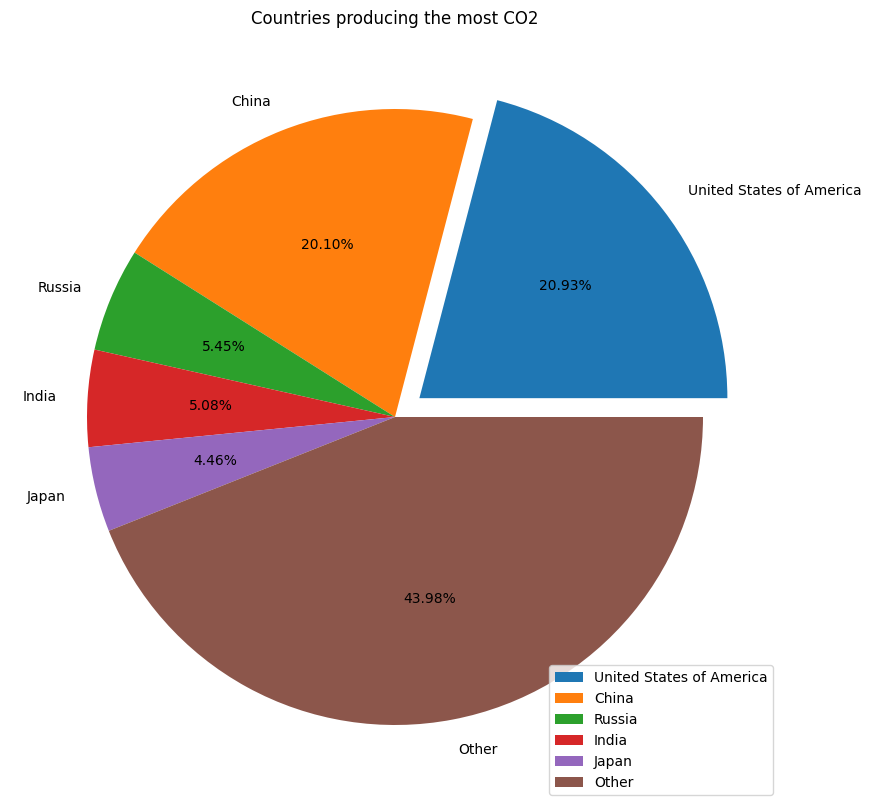

In [3]:
#Question A) Finds which countries are in the top 5 of producing the most CO2 emissions and then displays which one is the number one.

sorted_countries = df.sort_values('Total_CO2_emissions', ascending = False)

top_countries = sorted_countries.head(5)
other_countries = df['Total_CO2_emissions'].sum() - top_countries['Total_CO2_emissions'].sum()
top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries, '']

plt.figure(figsize=(10, 10))
plt.pie(top_countries.iloc[:, 3], labels = top_countries.iloc[:, 0], autopct = '%.2f%%', explode = [.1,0,0,0,0,0])
plt.title('Countries producing the most CO2')

plt.legend(bbox_to_anchor=(1, 0), loc="lower right")
plt.show()

Question A Cont) The countries that produce the most CO2 are Japan, India, Russia, China, and The United States of America. The United States of America is the number one producer of CO2. The 'Other' in this chart represents the total amount of CO2 that is produced by ALL of the other countries in the world combined. This means that the top five countries producing CO2 are producing way over half of the world's CO2 emissions. So, if we wanted to take any measures to try and decrease the CO2 emission in our atmosphere, it would be best to include at lease one of these five countries to make a noticeable impact.

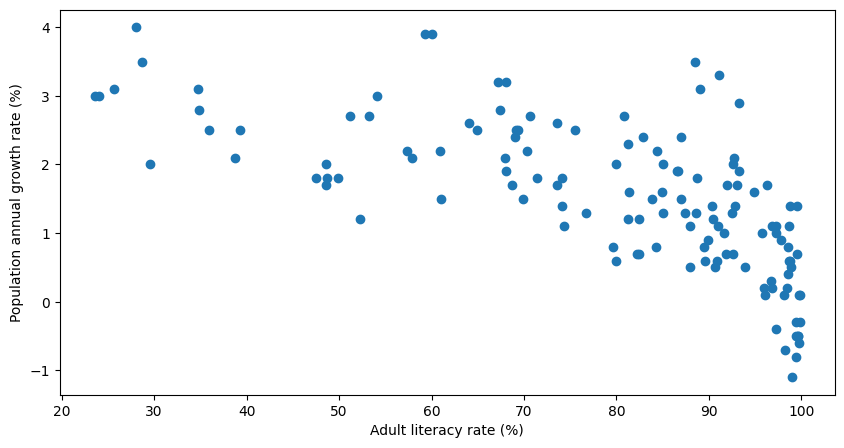

In [4]:
#Question B) determines if there is a relationship between the Adult literacy rate and Population annual growth rate.
comparing_data = df[['Adult literacy rate (%)', 'Population annual growth rate (%)']]
comparing_data = comparing_data.loc[comparing_data['Adult literacy rate (%)'] > 0]

plt.figure(figsize=(10, 5))
plt.scatter(comparing_data['Adult literacy rate (%)'], comparing_data['Population annual growth rate (%)'])
plt.ylabel('Population annual growth rate (%)')
plt.xlabel('Adult literacy rate (%)')
plt.show()

Question B cont) There is a moderately strong negative correlation between a country's Population annual growth rate and the Adult literacy rate. While the relation is weaker the lower the literacy rate is, it is still close enough to be determined. What this means is that a country with a low Adult literacy rate will more than likely have a higher population growth rate than a country that has a higher Adult literacy rate.

C:\Users\burny\AppData\Local\Temp\ipykernel_17812\2472067812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.loc[len(top_countries.index)] = ['Other', '', '', '', other_countries]


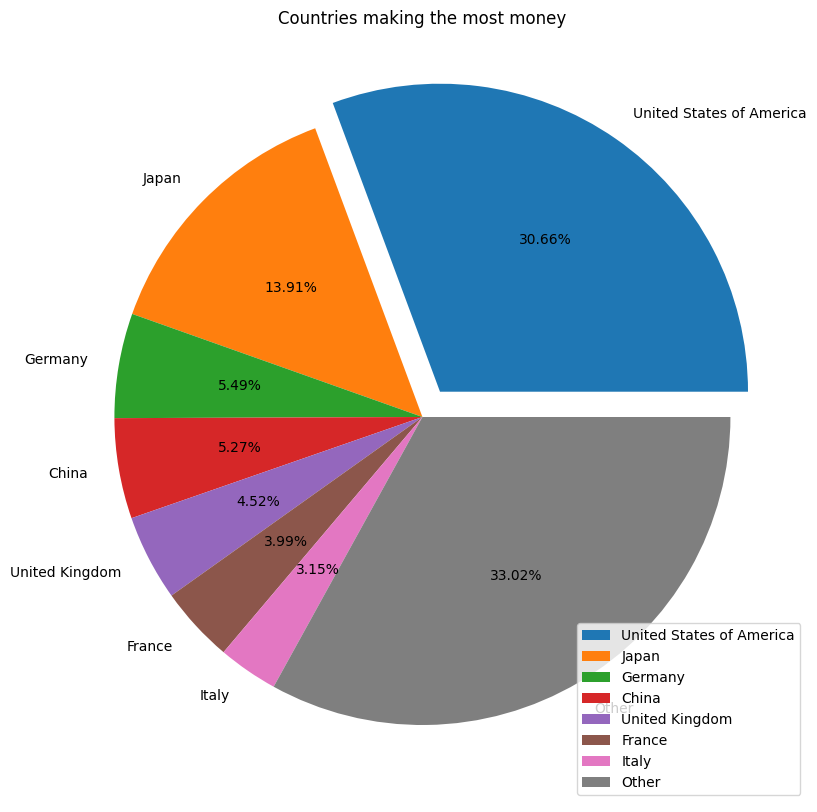

In [5]:
#Question C) Finds which countries are in the top 7 of making the most money
sorted_countries = df.sort_values('Total_income', ascending = False)

top_countries = sorted_countries.head(7)
other_countries = df['Total_income'].sum() - top_countries['Total_income'].sum()
top_countries.loc[len(top_countries.index)] = ['Other', '', '', '', other_countries]

plt.figure(figsize=(10, 10))
plt.pie(top_countries.iloc[:, 4], labels = top_countries.iloc[:, 0], autopct = '%.2f%%', explode = [.1,0,0,0,0,0,0,0])
plt.title('Countries making the most money')

plt.legend(bbox_to_anchor=(1, 0), loc="lower right")
plt.show()

Question C cont.) The countries that make the most money is the United States of America, Japan, Germany, China, The United Kingdom, France, and Italy. The United States makes the most money of the top 7 and makes about the same amount as all four of them combined. The top seven in the world make around 67% of the worlds income. This means that the top seven countries have more economic power combined than all the other countries. 

Question 4)
__Summary__: Overall, the main findings from this project are: - The top five CO2 emissions countries produce more than half of the world's CO2. - There is a moderately strong correlation between a country's Population annual growth rate and the Adult literacy rate. - The top 7 money making countries in the world make around 67% of the total income of the world. 

__Problems__: Honestly, I was very satisfied with this data overall, but I had some issues with the missing data for the recordings of some of the country's literacy rates, CO2 emissions, and Population growth rate. So, I had to do some accomodating and didn't get a "100%" accurate summary and finding of the comparisons here.

__further_Explore__: One of the topics I want to explore in the future is to find the correlation between the total income of a country to the CO2 emission that country produces and other ways CO2 emission may have correlations in countries.

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).

DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else. By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Steven Carriger